In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [32]:
import pandas as pd

df_calories = pd.read_csv(r"/content/calories.csv")
df_exercise = pd.read_csv(r"/content/exercise.csv")

print(df_calories.head())
print(df_exercise.head())
df = pd.merge(df_calories, df_exercise, on='User_ID')
print(df)

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
        User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0      14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1      14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2      11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3      16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4      17771927      35.

In [33]:
print("Data Information")
df.info()

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [34]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [35]:
# check for missing values
print(df.sum())

User_ID                                            224660378077
Calories                                              1343093.0
Gender        malefemalemalefemalefemalefemalefemalemalemale...
Age                                                      641847
Height                                                2616977.0
Weight                                                1124503.0
Duration                                               232959.0
Heart_Rate                                            1432778.0
Body_Temp                                              600381.8
dtype: object


In [36]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [43]:
# dataframe after encoding 'gender' column
print(df.head())

    User_ID  Calories  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363     231.0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698      66.0   20   166.0    60.0      14.0        94.0       40.3   
2  11179863      26.0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408      71.0   34   179.0    71.0      13.0       100.0       40.5   
4  17771927      35.0   27   154.0    58.0      10.0        81.0       39.8   

   Gender_male  
0         True  
1        False  
2         True  
3        False  
4        False  


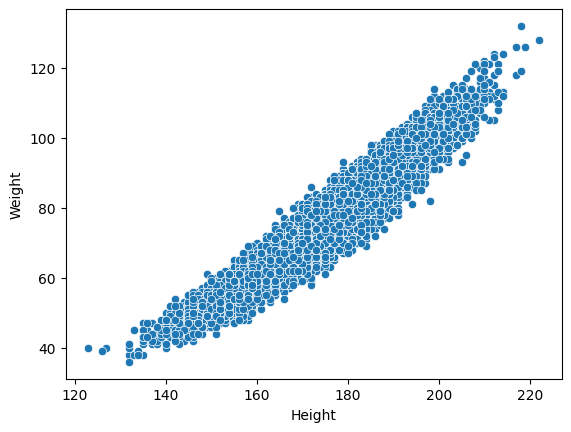

In [37]:
sb.scatterplot(x='Height', y='Weight', data=df)
plt.show()

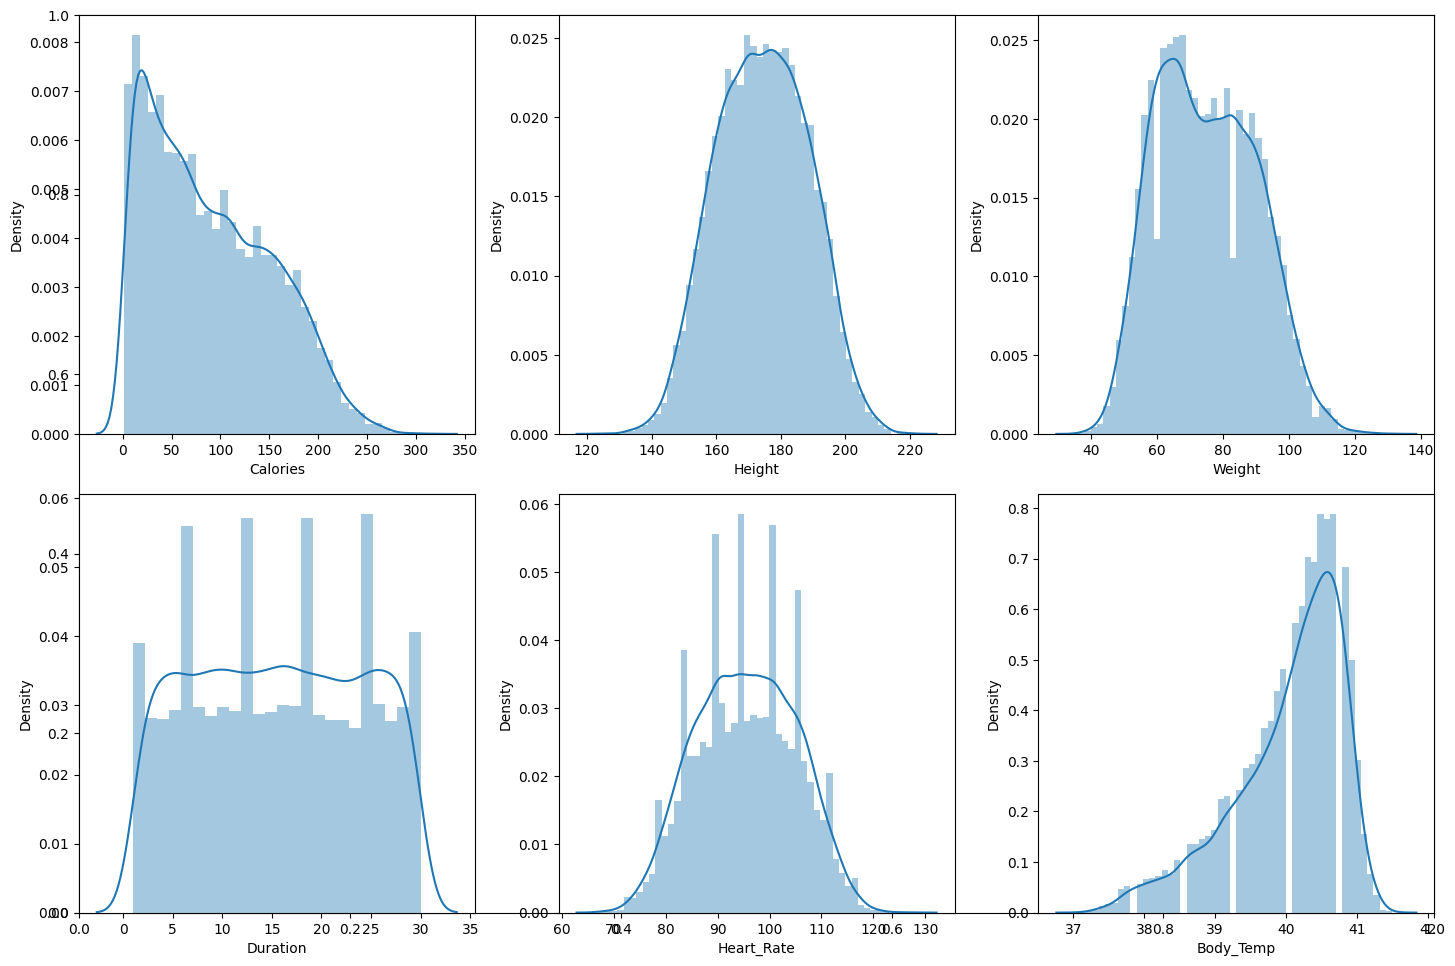

In [47]:
# the distribution of the continuous features
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

Feature Selection & Model Training

In [49]:
X = df.drop(columns=['User_ID', 'Calories'])
y = df['Calories']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {X_train.shape[0]} training samples and {X_test.shape[0]} testing samples.")

Data split into 12000 training samples and 3000 testing samples.


In [52]:
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation

Mean Absolute Error (MAE): 1.50
R-squared (R²): 0.9989


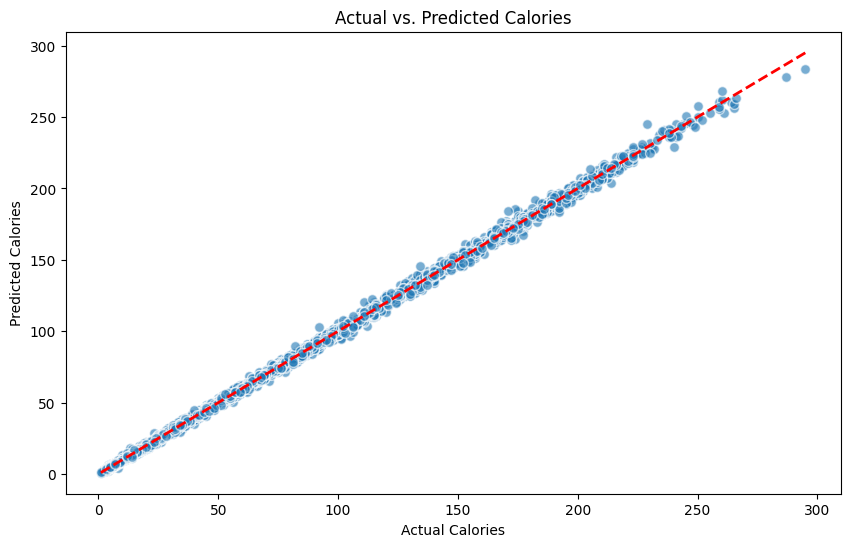

In [54]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# visualizing the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories")
plt.show() # The closer the blue dots are to the red dashed line, the better the model's predictions